In [1]:
import numpy as np
import sklearn
import scipy
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import statsmodels

In [3]:
import numpy as np
import sklearn
import scipy
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.stats import *

In [4]:
def kNN(X, Y, k):
    
    if(X.shape[1] !=  Y.shape[1]):
        X, Y = append_zeros(X,Y)
        
    neigh = NearestNeighbors(k+1)
    neigh.fit(Y)
    return neigh.kneighbors(X, k+1, return_distance=True)   

In [5]:
def entropy_estimator_KozaLeo(X, k):
    
    dist_x, index_x = kNN(X, X, k)
    N,d = X.shape[0], X.shape[1]
    entropy = np.sum(np.log(dist_x[:, k]*2+0.000001))*(d/N)
    #print(X, dist_x)
    
    entropy = entropy - scipy.special.digamma(k) + scipy.special.digamma(N)
    
    Volume_d = (np.pi**(d/2)/scipy.special.gamma(d/2 + 1))*(1/2**d)
    
    entropy = entropy + np.log(Volume_d)
    
    return entropy

In [6]:
def ret_normal_entropy(sigma):
    dim = sigma.shape[0]
    
    return (dim/2. + (dim/2.)*np.log(2*np.pi) + 0.5*np.log(np.linalg.det(sigma)))

In [7]:
def entropy_resub(samples, arg="scott"): # samples.shape = (# of dim, # of data)
    kernel = scipy.stats.gaussian_kde(samples, bw_method = arg)    
    prob = np.array(kernel(samples))
    #print(prob.shape)
    epsilon = 0.000001
    
    return -1*np.mean(np.log(epsilon + prob))

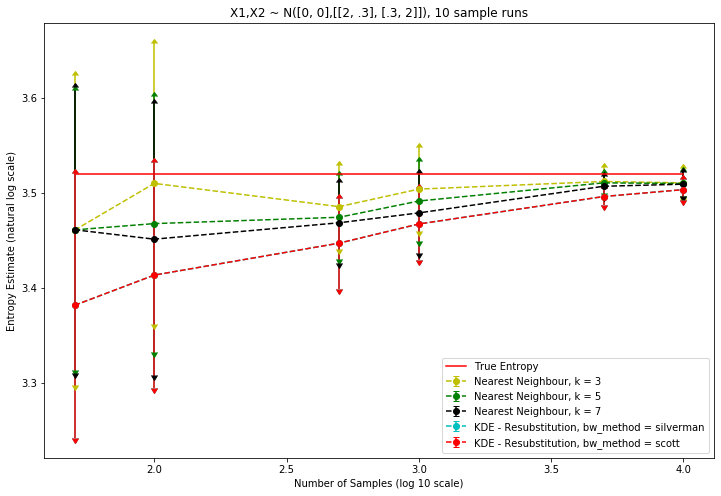

In [10]:
sigma = np.array([[2, .3], [.3, 2]])
rv = multivariate_normal([0, 0], sigma)
neighbors = [3, 5, 7] 
colors = ['y', 'g', 'k']
seeds = list(np.arange(10))
samples = [50 ,100, 500, 1000, 5000, 10000]
#entropy_estimates_KLD = np.zeros([len(seeds),len(samples)])
entropy_estimates_KozaLeo = np.zeros([len(seeds),len(samples)])
bw = ["silverman", "scott"]
colors2 = ['c', 'r']
samples = [50 ,100, 500, 1000, 5000, 10000]
#entropy_estimates_KLD = np.zeros([len(seeds),len(samples)])
entropy_estimates_KDE_resub = np.zeros([len(seeds),len(samples)])
X = 0


fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.set_title("X1,X2 ~ N([0, 0],[[2, .3], [.3, 2]]), 10 sample runs")

for k,color in zip(neighbors,colors):
    #entropy_estimates_KLD = np.zeros([len(seeds),len(samples)])
    entropy_estimates_KozaLeo = np.zeros([len(seeds),len(samples)])
    for seed in seeds:
        m = 0
        for sample in samples:
            X = np.array(rv.rvs(size=sample, random_state=seed))
            entropy_estimates_KozaLeo[seed,m]=(entropy_estimator_KozaLeo(X,k))
            m = m + 1

    b1 = np.mean(entropy_estimates_KozaLeo, axis=0)
    b2 = np.std(entropy_estimates_KozaLeo, axis=0)

    label_plot = "Nearest Neighbour, k = " + str(k)
    plt.errorbar(np.log(samples)/np.log(10), b1, yerr=b2, c=color,fmt='--o', uplims=True, lolims=True, label=label_plot)

for k,color in zip(bw,colors2):
    #entropy_estimates_KLD = np.zeros([len(seeds),len(samples)])
    entropy_estimates_KDE = np.zeros([len(seeds),len(samples)])
    for seed in seeds:
        #np.random.seed(seed)
        m = 0
        for sample in samples:
            X = np.array(rv.rvs(size=sample, random_state=seed)).T
            entropy_estimates_KDE_resub[seed,m]=entropy_resub(X, k)
            m = m + 1


    b1 = np.mean(entropy_estimates_KDE_resub, axis=0)
    b2 = np.std(entropy_estimates_KDE_resub, axis=0)

    label_plot = "KDE - Resubstitution, bw_method = " + str(k)
    plt.errorbar(np.log(samples)/np.log(10), b1, yerr=b2, c=color,fmt='--o', uplims=True, lolims=True, label=label_plot)
    
entropy = ret_normal_entropy(sigma)
plt.plot(np.log(samples)/np.log(10),np.zeros(len(samples))+entropy, c='r', label="True Entropy")
plt.legend(loc='lower right')
plt.xlabel("Number of Samples (log 10 scale)")
plt.ylabel("Entropy Estimate (natural log scale)")
plt.show()